     |████████████████████████████████| 103 kB 19.8 MB/s 


In [ ]:
import pyupbit

In [ ]:
df = pyupbit.get_ohlcv("KRW-ORBS", interval="minute60")
df


,open,high,low,close,volume,value
2022-01-26 06:00:00,71.2,71.2,70.8,70.9,2.669093e+05,1.893934e+07
2022-01-26 07:00:00,70.9,71.3,70.8,71.2,6.805306e+05,4.834503e+07
2022-01-26 08:00:00,71.2,72.0,71.0,71.8,2.170639e+06,1.550315e+08
2022-01-26 09:00:00,71.8,72.2,70.6,70.8,2.115285e+06,1.505415e+08
2022-01-26 10:00:00,71.0,72.0,71.0,71.9,3.262562e+05,2.335948e+07
...,...,...,...,...,...,...
2022-02-03 09:00:00,79.0,82.3,79.0,80.3,4.668878e+06,3.757789e+08
2022-02-03 10:00:00,80.3,83.0,80.0,81.0,8.104132e+06,6.610534e+08
2022-02-03 11:00:00,81.0,81.2,79.0,80.2,4.188442e+06,3.349410e+08
2022-02-03 12:00:00,80.0,80.7,79.4,79.6,1.601886e+06,1.279202e+08


In [ ]:
#시간은(ds)와 증가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-01-26 06:00:00,70.9
1,2022-01-26 07:00:00,71.2
2,2022-01-26 08:00:00,71.8
3,2022-01-26 09:00:00,70.8
4,2022-01-26 10:00:00,71.9
...,...,...
195,2022-02-03 09:00:00,80.3
196,2022-02-03 10:00:00,81.0
197,2022-02-03 11:00:00,80.2
198,2022-02-03 12:00:00,79.6


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

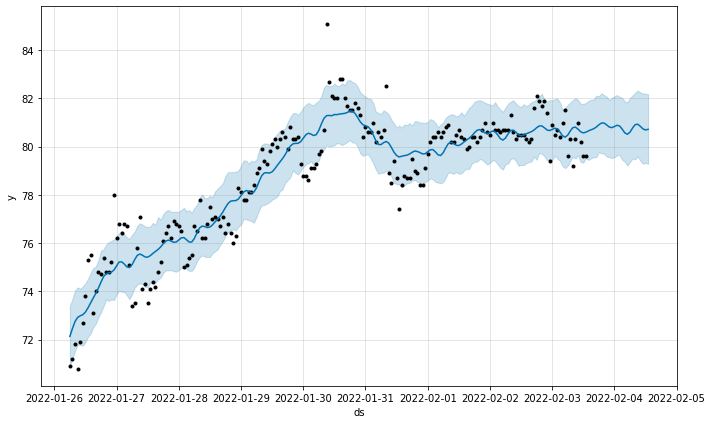

In [ ]:
#그래프1
fig1 = model.plot(forecast)

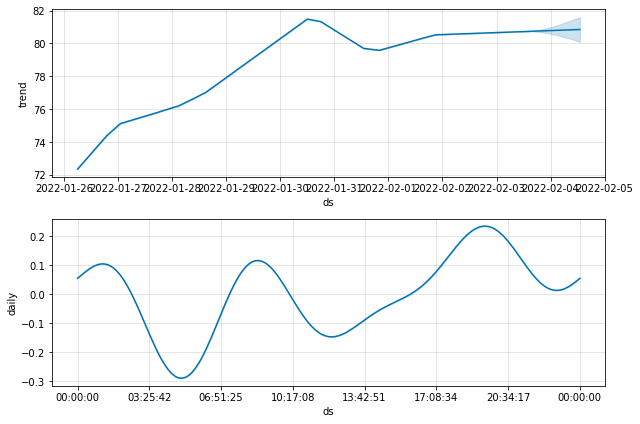

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-ORBS")
nowValue

79.6

In [ ]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

80.93045922018287

In [ ]:
#구체적인 가격
print("현재 시점 가격 :" , nowValue)
print("종가의 가격 :" , closeValue)

현재 시점 가격 : 79.6
종가의 가격 : 80.93045922018287
